In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

In [2]:
model = YOLO(r"C:\Users\Ps199\Desktop\ML\Pothole Detection\best.pt")
class_names = model.names

KeyboardInterrupt: 

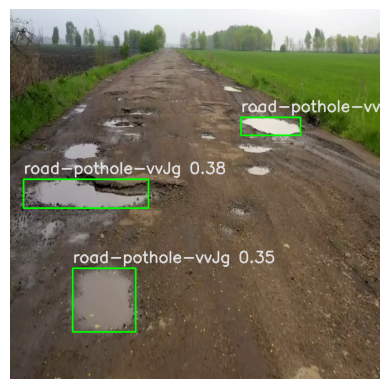

In [3]:
cap = cv2.VideoCapture(r"C:\Users\Ps199\Desktop\ML\Pothole Detection\Data\sample_video.mp4")

count = 0
while True:
  ret, img = cap.read()
  if not ret:
    break

  count += 1
  if count % 3 != 0:
    continue

  img = cv2.resize(img, (640, 640))
  h, w, _ = img.shape

  result = model.predict(img, save = False, conf = 0.25)
  
  for r in result:
    boxes = r.boxes
    
    for box in boxes:
      x1, y1, x2, y2 = map(int, box.xyxy[0])
      cls = int(box.cls[0])
      conf = box.conf.item()
      label = f"{class_names[cls]} {conf:.2f}"

      cv2.rectangle(img, (x1,y1), (x2, y2), (0, 255, 0), 2)
      cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (225, 225, 225), 2)

  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  plt.imshow(img)
  plt.axis('off')
  clear_output(wait=True)
  display(plt.gcf())

cap.release()